In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import talib
from sklearn.model_selection import train_test_split 

In [120]:
import random
random.seed(42)

In [121]:
dataset = pd.read_csv('C://Greece_EQ_Euro_wDS_AIR_CT19.csv')

In [122]:
dataset

,Loss,Magnitude,FocalDepth,Longitude,Latitude,Rate
0,0.0,5.59,21.6,56.854,28.363,0.0001
1,0.0,5.22,13.7,-29.652,49.738,0.0001
2,0.0,5.02,4.6,23.078,34.703,0.0001
3,0.0,5.60,24.3,-10.544,30.328,0.0001
4,0.0,5.50,2.7,19.881,37.587,0.0001
...,...,...,...,...,...,...
817246,0.0,5.20,5.0,-44.213,27.002,0.0001
817247,0.0,5.16,13.3,10.110,45.196,0.0001
817248,0.0,5.15,60.3,48.142,33.263,0.0001
817249,0.0,5.40,114.9,24.971,36.428,0.0001


In [123]:
dataset.drop('Rate',axis=1, inplace= True)
dataset

,Loss,Magnitude,FocalDepth,Longitude,Latitude
0,0.0,5.59,21.6,56.854,28.363
1,0.0,5.22,13.7,-29.652,49.738
2,0.0,5.02,4.6,23.078,34.703
3,0.0,5.60,24.3,-10.544,30.328
4,0.0,5.50,2.7,19.881,37.587
...,...,...,...,...,...
817246,0.0,5.20,5.0,-44.213,27.002
817247,0.0,5.16,13.3,10.110,45.196
817248,0.0,5.15,60.3,48.142,33.263
817249,0.0,5.40,114.9,24.971,36.428


In [124]:
from sklearn.preprocessing import scale
scale_data= scale(dataset)
df_dataset= pd.DataFrame(scale_data, index= dataset.index, columns= dataset.columns)
df_dataset


,Loss,Magnitude,FocalDepth,Longitude,Latitude
0,-0.037721,0.573079,-0.011757,1.223504,-1.041748
1,-0.037721,-0.377694,-0.298926,-1.565259,0.787972
2,-0.037721,-0.891626,-0.629715,0.134640,-0.499038
3,-0.037721,0.598776,0.086390,-0.949259,-0.873542
4,-0.037721,0.341810,-0.698781,0.031576,-0.252165
...,...,...,...,...,...
817246,-0.037721,-0.429087,-0.615175,-2.034674,-1.158251
817247,-0.037721,-0.531874,-0.313466,-0.283420,0.399172
817248,-0.037721,-0.557570,1.395009,0.942648,-0.622303
817249,-0.037721,0.084844,3.379747,0.195666,-0.351376


In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[2658627. 2485027.       0. ...       0.       0.       0.]


In [127]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation

In [128]:
model = Sequential()

In [129]:
model.add(Dense(2,input_dim=4, activation = 'relu'))

In [130]:
model.add(Dense(1))

In [131]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [132]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [133]:
history= model.fit(X_train, y_train, verbose=1, epochs = 1000, validation_data= (X_test, y_test))

Epoch 1/1000
19155/19155 [==============================] - 40s 2ms/step - loss: 123304954835238912.0000 - val_loss: 255073744022667264.0000
Epoch 2/1000
19155/19155 [==============================] - 40s 2ms/step - loss: 123304825986220032.0000 - val_loss: 255073744022667264.0000
Epoch 3/1000
19155/19155 [==============================] - 39s 2ms/step - loss: 123305100864126976.0000 - val_loss: 255073709662928896.0000
Epoch 4/1000
19155/19155 [==============================] - 38s 2ms/step - loss: 123304937655369728.0000 - val_loss: 255073692483059712.0000
Epoch 5/1000
19155/19155 [==============================] - 38s 2ms/step - loss: 123304619827789824.0000 - val_loss: 255073692483059712.0000
Epoch 6/1000
19155/19155 [==============================] - 40s 2ms/step - loss: 123304267640471552.0000 - val_loss: 255073640943452160.0000
Epoch 7/1000
19155/19155 [==============================] - 40s 2ms/step - loss: 123304456619032576.0000 - val_loss: 255073623763582976.0000
Epoch 8/1000


Epoch 59/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123298941881024512.0000 - val_loss: 255065927182188544.0000
Epoch 60/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123299002010566656.0000 - val_loss: 255065738203627520.0000
Epoch 61/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123297550311620608.0000 - val_loss: 255065463325720576.0000
Epoch 62/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123298177376845824.0000 - val_loss: 255065154088075264.0000
Epoch 63/1000
19155/19155 [==============================] - 29s 2ms/step - loss: 123298340585603072.0000 - val_loss: 255064793310822400.0000
Epoch 64/1000
19155/19155 [==============================] - 28s 1ms/step - loss: 123298048527826944.0000 - val_loss: 255064449713438720.0000
Epoch 65/1000
19155/19155 [==============================] - 28s 1ms/step - loss: 123297309793452032.0000 - val_loss: 255064174835531776.0000
Epoch 

19155/19155 [==============================] - 30s 2ms/step - loss: 123281444184260608.0000 - val_loss: 255043851050287104.0000
Epoch 117/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123281547263475712.0000 - val_loss: 255043318474342400.0000
Epoch 118/1000
19155/19155 [==============================] - 31s 2ms/step - loss: 123281195076157440.0000 - val_loss: 255042906157481984.0000
Epoch 119/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123280945968054272.0000 - val_loss: 255042545380229120.0000
Epoch 120/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123280911608315904.0000 - val_loss: 255041944084807680.0000
Epoch 121/1000
19155/19155 [==============================] - 30s 2ms/step - loss: 123280044024922112.0000 - val_loss: 255041377149124608.0000
Epoch 122/1000
19155/19155 [==============================] - 33s 2ms/step - loss: 123280086974595072.0000 - val_loss: 255040827393310720.0000
Epoch 123/1000

KeyboardInterrupt: 

In [114]:
prediction_test= model.predict(X_test)

[0. 0. 0. ... 0. 0. 0.]


In [116]:
print(prediction_test)

[[ 886.7754  ]
 [1224.096   ]
 [2321.678   ]
 ...
 [3447.761   ]
 [  69.689026]
 [1858.0857  ]]


In [117]:
print('mean sq error between y_test and predicted:',np.mean(prediction_test-y_test))

MemoryError: Unable to allocate 311. GiB for an array with shape (204313, 204313) and data type float64

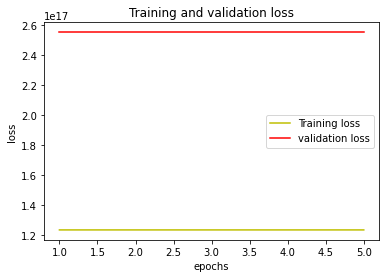

In [118]:
loss= history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss, 'y', label= 'Training loss')
plt.plot(epochs, val_loss,'r', label= 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()